In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pexpect import which

root_path = Path().absolute().parents[1]
figures_path = root_path / "common" / "resources" / "images" / "intro"

In [2]:
data = pd.read_csv('coronavirus.csv')

data['date'] = pd.to_datetime(data['date'])  # Ensure 'date' is in datetime format
data.set_index('date', inplace=True)

data = data[data.index < pd.to_datetime('2023-01-01')]

data

,count
date,
2020-01-01,799
2020-01-02,247
2020-01-03,183
2020-01-04,346
2020-01-05,198
...,...
2022-12-27,88520
2022-12-28,76499
2022-12-29,69629


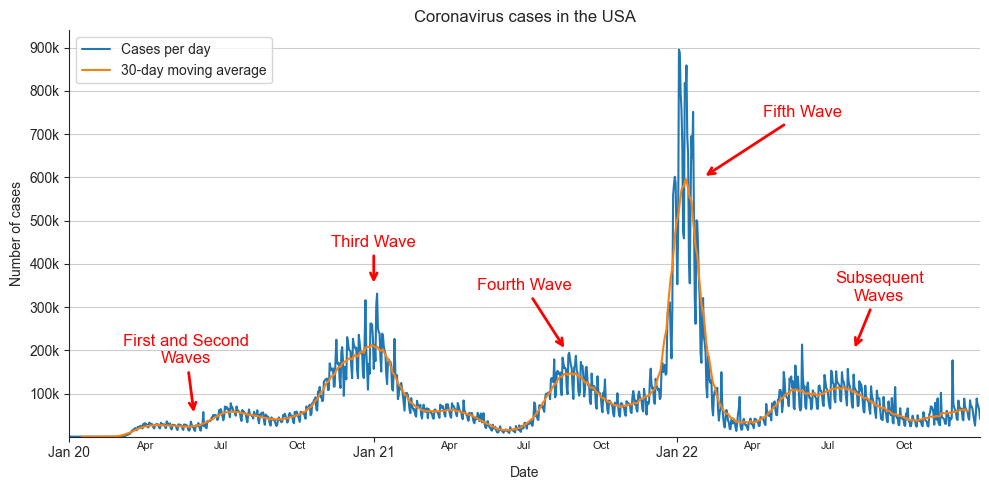

In [10]:
sns.set_style("white", rc={'xtick.bottom': True, 'ytick.left': True})

fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=data, x='date', y='count', ax=ax, label='Cases per day')
sns.lineplot(data=data.rolling(30, center=True).mean(), x='date', y='count', ax=ax, label='30-day moving average')

arrows = [
    ('First and Second\nWaves', (pd.to_datetime('2020-05-30'), 50000), (pd.to_datetime('2020-05-20'), 200000)),
    ('Third Wave', (pd.to_datetime('2021-01-01'), 350000), (pd.to_datetime('2021-01-01'), 450000)),
    ('Fourth Wave', (pd.to_datetime('2021-08-20'), 200000), (pd.to_datetime('2021-07-01'), 350000)),
    ('Fifth Wave', (pd.to_datetime('2022-02-01'), 600000), (pd.to_datetime('2022-06-01'), 750000)),
    ('Subsequent\nWaves', (pd.to_datetime('2022-08-01'), 200000), (pd.to_datetime('2022-09-01'), 345000)),
]

for (text, xy, xytext) in arrows:
    ax.annotate(
        text,
        xy=xy,
        xytext=xytext,
        arrowprops=dict(arrowstyle="->", color='red', linewidth=2),
        fontsize=12,
        color='red',
        horizontalalignment='center',
        verticalalignment='center',
    )

ax.set_title('Coronavirus cases in the USA')

ax.set_xlabel('Date')
ax.set_xlim(data.index[0], data.index[-1])

x_ticks = data.index.to_series().groupby(data.index.to_period('Q')).first()
x_ticks_major = x_ticks[::4]
x_ticks_minor = x_ticks[~x_ticks.isin(x_ticks_major)]

ax.set_xticks(x_ticks_major, x_ticks_major.dt.strftime('%b %y'))
ax.set_xticks(x_ticks_minor, x_ticks_minor.dt.strftime('%b'), minor=True, fontsize=8)
ax.tick_params(axis='x', which='minor', length=0)

ax.set_ylabel('Number of cases')
ax.set_ylim(0)

y_ticks = list(range(100000, 1000000, 100000))
ax.set_yticks(y_ticks, [f'{y // 1000}k' for y in y_ticks])

ax.spines[['top', 'right']].set_visible(False)
ax.grid(True, axis='y')

ax.legend(loc='upper left')

fig.tight_layout()
fig.savefig(figures_path / "coronavirus.svg")